In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

## Veri Önişleme

In [2]:
df = pd.read_csv("D:\Downloads\data.csv")
df.columns = df.columns.map(lambda x : x.replace(" ","_"))

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed:_32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df[df.diagnosis == "B"].iloc[19]

id                           859487
diagnosis                         B
radius_mean                   12.78
texture_mean                  16.49
perimeter_mean                81.37
area_mean                     502.5
smoothness_mean             0.09831
compactness_mean            0.05234
concavity_mean              0.03653
concave_points_mean         0.02864
symmetry_mean                 0.159
fractal_dimension_mean      0.05653
radius_se                    0.2368
texture_se                   0.8732
perimeter_se                  1.471
area_se                       18.33
smoothness_se              0.007962
compactness_se             0.005612
concavity_se                0.01585
concave_points_se          0.008662
symmetry_se                 0.02254
fractal_dimension_se       0.001906
radius_worst                  13.46
texture_worst                 19.76
perimeter_worst               85.67
area_worst                    554.9
smoothness_worst             0.1296
compactness_worst           

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [19]:
df = df.drop(["Unnamed:_32","id"],axis=1)

In [20]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Keşifsel veri analizi

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Değişkenler farklı ölçeklere sahip oldukları için tahminleme kısmına geçmeden önce scale etmemiz gerekiyor.

 ### Görselleştirme : 

Number of Benign:  357
Number of Malignant :  212


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


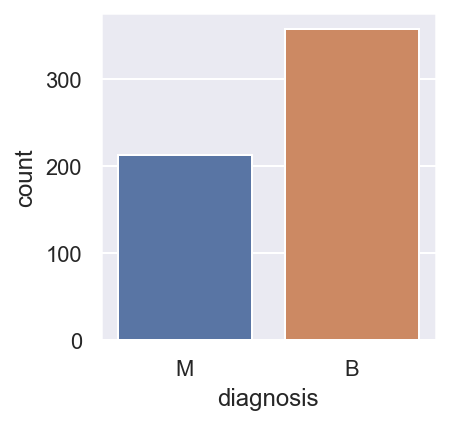

In [22]:
plt.figure(figsize=(3,3))
ax = sns.countplot(df["diagnosis"],label="Count");
B, M = df["diagnosis"].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

<AxesSubplot:>

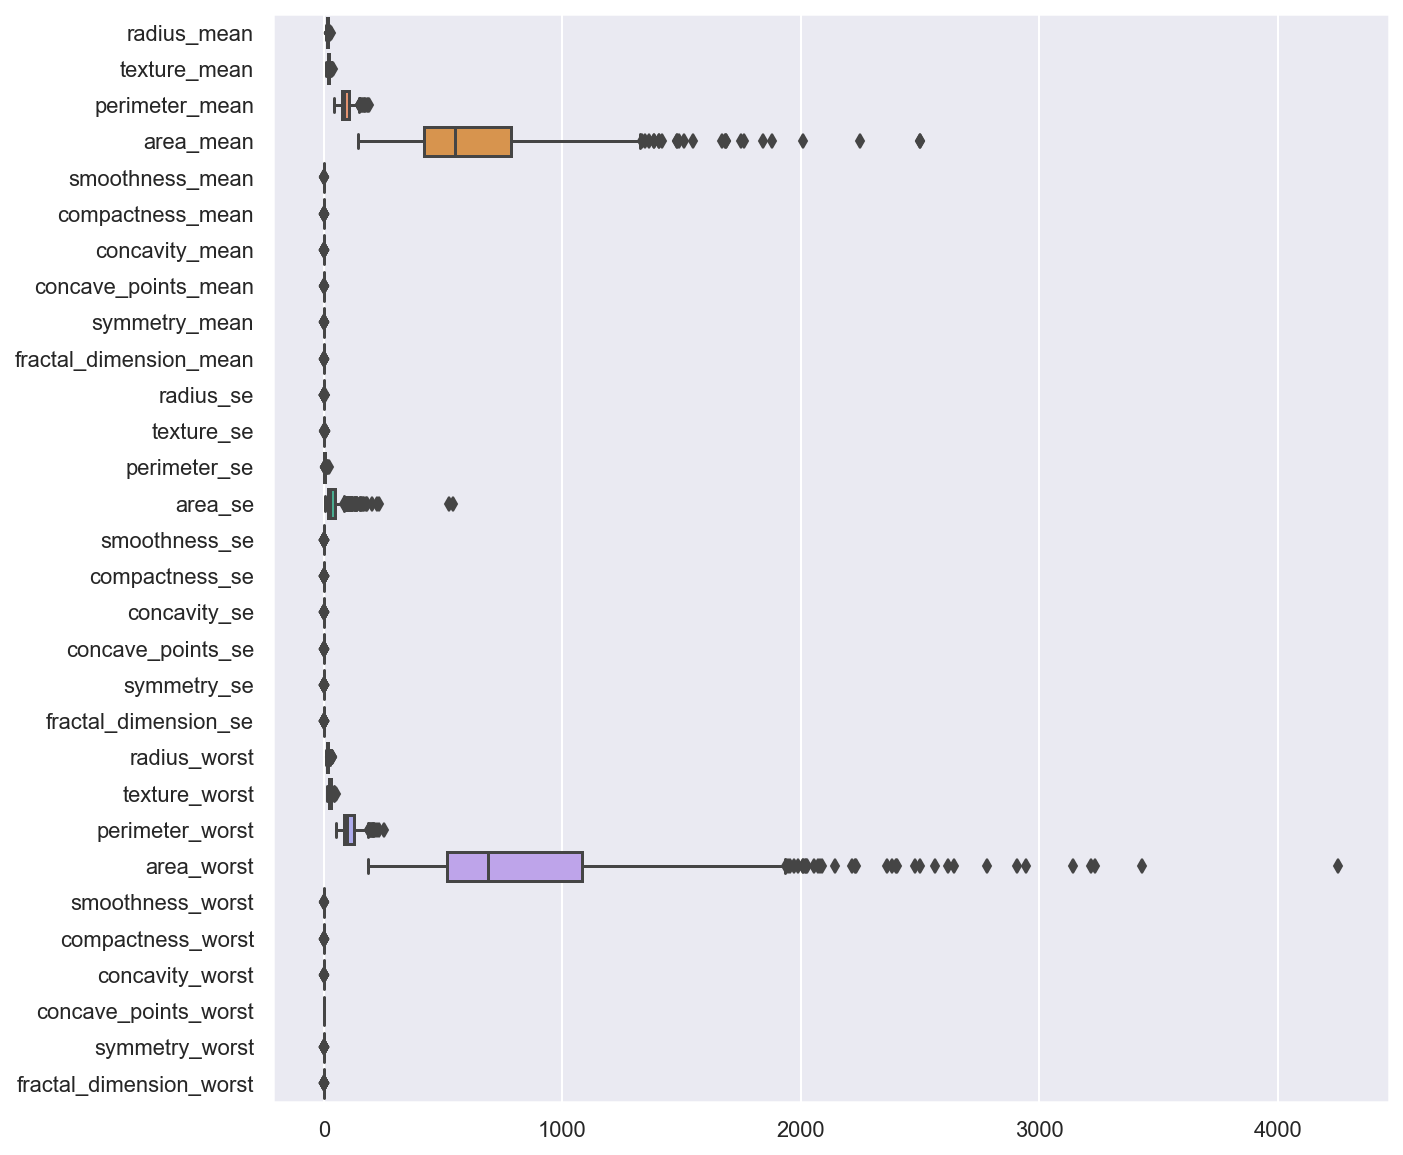

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient="h")

Bu grafikten çok bir anlam çıkaramıyoruz çünkü değişkenler farklı ölçeklerde değişiyor. Bir de scale edilmiş üzerinden boxplot grafiğine bakalım : 

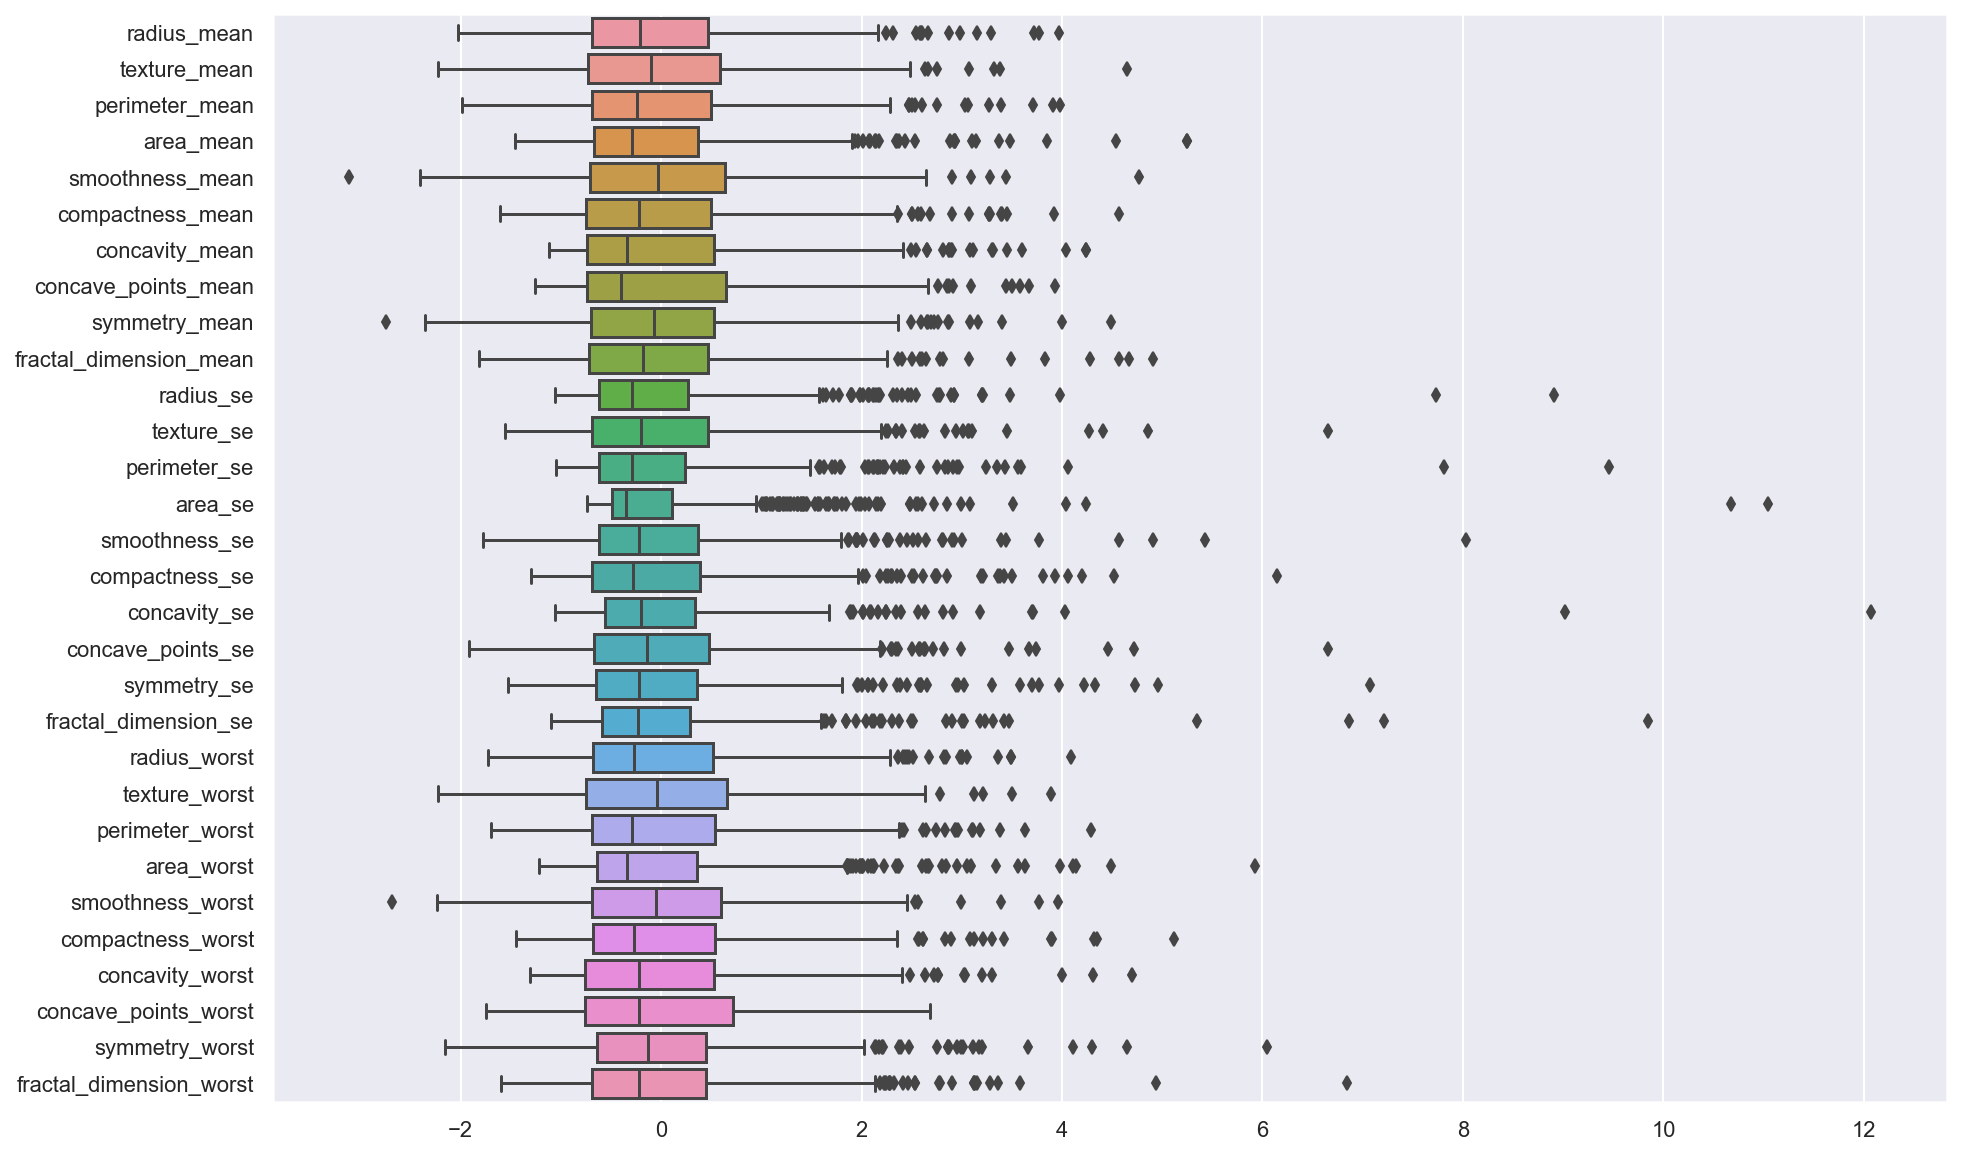

In [24]:
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(15,10))
scaled_data = StandardScaler().fit_transform(df.drop("diagnosis",axis=1))
scaled_data = pd.DataFrame(scaled_data,columns=df.drop("diagnosis",axis=1).columns)
sns.boxplot(data=scaled_data,orient="h");

<AxesSubplot:>

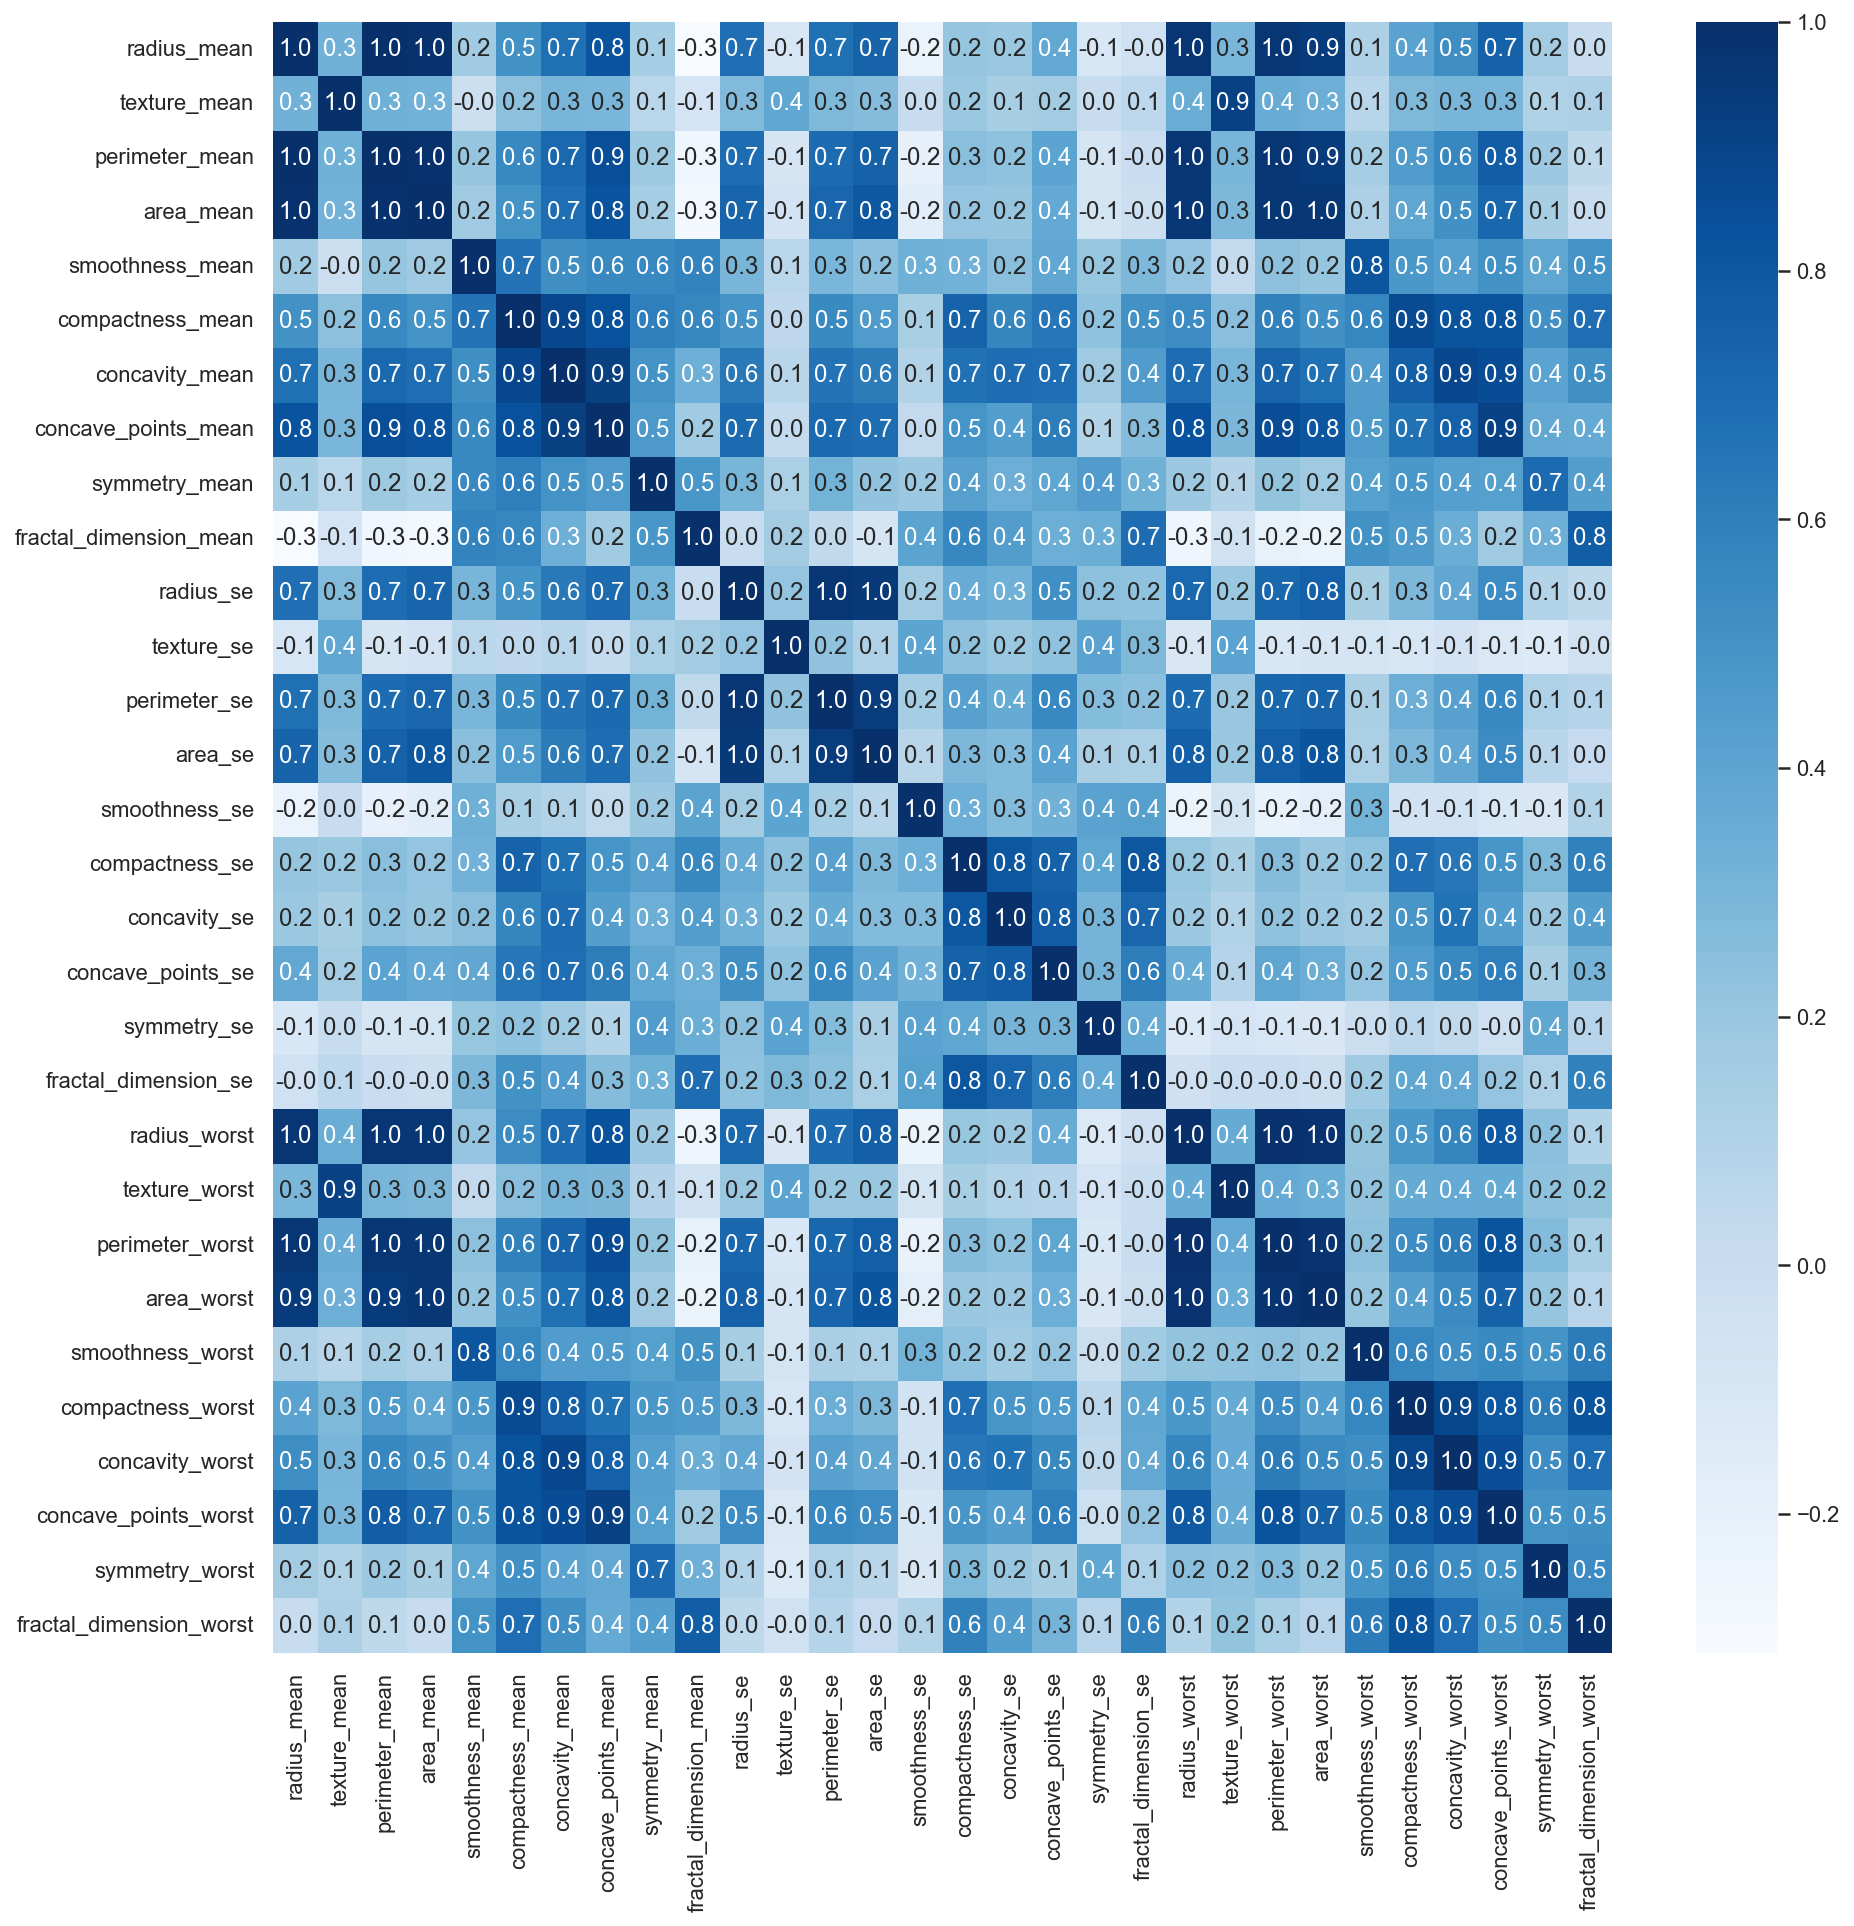

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cbar=True, fmt='.1f', annot=True, cmap='Blues')

Veride bir çok değişken kendinden farklı en az bir değişkenle yüksek korelasyona sahip, yani verimiz çoklu doğrusal bağlantıdan(multicollinearity) muzdarip. Değişkenleri birbirinden bağımsız hale getirmek için temel bileşenler analizi ile boyut küçültme ve çoklu doğrusal bağlantı azaltma aynı anda yapılabilir.

## Model Seçimi

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
dt = DecisionTreeClassifier()
lr = LogisticRegression(solver="liblinear")
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [28]:
y = df["diagnosis"]
X = df.drop(["diagnosis"],axis=1)
X_scaled = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)
X_scaled_train,X_scaled_test,y_train,y_test = train_test_split(X_scaled,y,train_size=0.7,shuffle=True,random_state=42)

Önce boyutu küçültülmemiş orjinal veri ve scale edilmiş veri üzerinden kıyaslama yapalım.

In [29]:
print("ORIGINAL DATA:")
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\nSCALED DATA:")
dt.fit(X_scaled_train,y_train)
y_pred = dt.predict(X_scaled_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

ORIGINAL DATA:
0.935672514619883
              precision    recall  f1-score   support

           B       0.93      0.97      0.95       103
           M       0.95      0.88      0.92        68

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[100   3]
 [  8  60]]

SCALED DATA:
0.935672514619883
              precision    recall  f1-score   support

           B       0.93      0.97      0.95       103
           M       0.95      0.88      0.92        68

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[100   3]
 [  8  60]]


In [30]:
print("ORIGINAL DATA:")
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\nSCALED DATA:")
lr.fit(X_scaled_train,y_train)
y_pred = lr.predict(X_scaled_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

ORIGINAL DATA:
0.9649122807017544
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       110
           M       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[106   4]
 [  2  59]]

SCALED DATA:
0.9824561403508771
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       107
           M       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   1]
 [  2  62]]


In [31]:
print("ORIGINAL DATA:")
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\nSCALED DATA:")
rf.fit(X_scaled_train,y_train)
y_pred = rf.predict(X_scaled_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

ORIGINAL DATA:
0.9649122807017544
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       110
           M       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[106   4]
 [  2  59]]

SCALED DATA:
0.9707602339181286
              precision    recall  f1-score   support

           B       0.99      0.96      0.98       111
           M       0.94      0.98      0.96        60

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   4]
 [  1  59]]


In [32]:
print("ORIGINAL DATA:")
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\nSCALED DATA:")
gb.fit(X_scaled_train,y_train)
y_pred = gb.predict(X_scaled_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

ORIGINAL DATA:
0.9590643274853801
              precision    recall  f1-score   support

           B       0.97      0.96      0.97       109
           M       0.94      0.95      0.94        62

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[105   4]
 [  3  59]]

SCALED DATA:
0.9590643274853801
              precision    recall  f1-score   support

           B       0.97      0.96      0.97       109
           M       0.94      0.95      0.94        62

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

[[105   4]
 [  3  59]]


Scale edilmiş veriden neredeyse hep daha iyi sonuç aldık bu yüzden scale edilmiş hali ile devam edeceğiz.

## Boyut küçültme

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


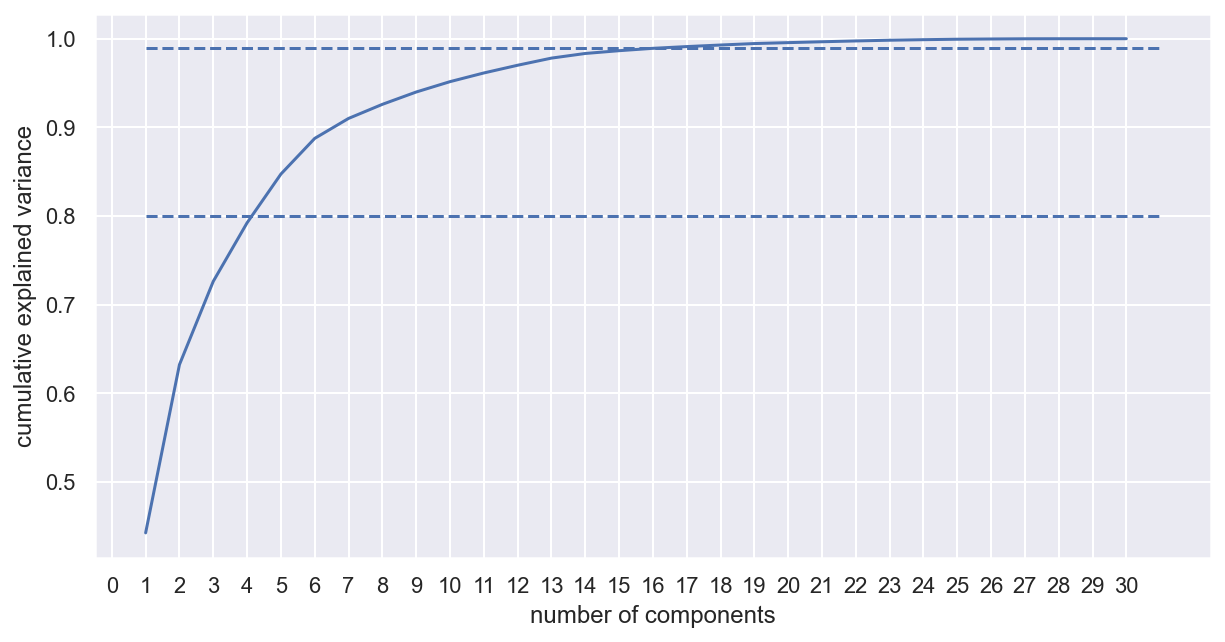

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
cumulative_explained_var = np.cumsum(pca.explained_variance_ratio_)
p = X_scaled.shape[-1]

plt.figure(figsize = (10,5))
plt.plot(range(1, p + 1), cumulative_explained_var)
plt.xticks(range(0,p+1,))
plt.hlines(0.8, 1, p+1, linestyles='--')
plt.hlines(0.99, 1, p+1, linestyles='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(np.cumsum(pca.explained_variance_ratio_))

Sadece 10 temel bileşen ile verideki toplam varyansın yaklaşık %95ini açıklayabildiğimizi gördük.PCA fonksiyonundaki n_components = 10 olmalı.

In [34]:
pca = PCA(n_components=10)
X_s_pca = pca.fit_transform(X_scaled)
X_s_pca_train,X_s_pca_test,y_train,y_test = train_test_split(X_scaled,y,train_size=0.7,shuffle=True,random_state=42)

Şimdi modellerimizi orijinal ve scale + pca uygulanmış veri üzerinden karşılaştıralım.

## LOGREG

In [35]:
lr = LogisticRegression(solver="liblinear")

In [36]:
print("ORIGINAL DATA:")
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\n SCALED and DIMRED DATA:")
lr.fit(X_s_pca_train,y_train)
y_pred = lr.predict(X_s_pca_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

ORIGINAL DATA:
0.9649122807017544
              precision    recall  f1-score   support

           B       0.98      0.96      0.97       110
           M       0.94      0.97      0.95        61

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

[[106   4]
 [  2  59]]

 SCALED and DIMRED DATA:
0.9824561403508771
              precision    recall  f1-score   support

           B       0.98      0.99      0.99       107
           M       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

[[106   1]
 [  2  62]]


Performans artışı

## RANDOM FOREST

In [37]:
rf = RandomForestClassifier()

In [38]:
print("ORIGINAL DATA:")
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print("\n SCALED and DIMRED DATA:")
rf.fit(X_s_pca_train,y_train)
y_pred = rf.predict(X_s_pca_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

ORIGINAL DATA:
0.9766081871345029
              precision    recall  f1-score   support

           B       0.99      0.97      0.98       110
           M       0.95      0.98      0.97        61

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171

[[107   3]
 [  1  60]]

 SCALED and DIMRED DATA:
0.9707602339181286
              precision    recall  f1-score   support

           B       0.99      0.96      0.98       111
           M       0.94      0.98      0.96        60

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

[[107   4]
 [  1  59]]


Performans düşüşü, kazanan model lojistik regresyon diyebiliriz.

### Hyper-tuning aşaması

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler()
pca = PCA(n_components=10)
lr = LogisticRegression()
pipe = Pipeline([("scaler",scaler),("dimension_reduction",pca),("classifier",lr)])
param_grid = {"classifier__penalty":["l1","l2"],"classifier__C":np.logspace(0,4,10),"classifier__solver":["liblinear"]}
grid = GridSearchCV(pipe,param_grid=param_grid,n_jobs=-1,verbose=5)


In [40]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dimension_reduction',
                                        PCA(n_components=10)),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             verbose=5)

In [41]:
print(f"Best parameters : {grid.best_params_}")

Best parameters : {'classifier__C': 2.7825594022071245, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [42]:
model = grid.best_estimator_

In [43]:
y_pred = model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9883040935672515
              precision    recall  f1-score   support

           B       0.99      0.99      0.99       108
           M       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[107   1]
 [  1  62]]


In [44]:
import pickle
pickle.dump(model,open("model.pkl","wb")) # Web uygulamasında kullanmak için en iyi modeli kaydetme